In [1]:
df <- iris

In [2]:
set.seed(123)
kmeans_result <- kmeans(df[, 1:4], centers = 3)
kmeans_result

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [3]:
kmeans_result <- kmeans(df[, c("Petal.Length", "Petal.Width")], centers = 3)
kmeans_result

K-means clustering with 3 clusters of sizes 52, 50, 48

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     1.462000    0.246000
3     5.595833    2.037500

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 3 3 3 3
[112] 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1] 13.05769  2.02200 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

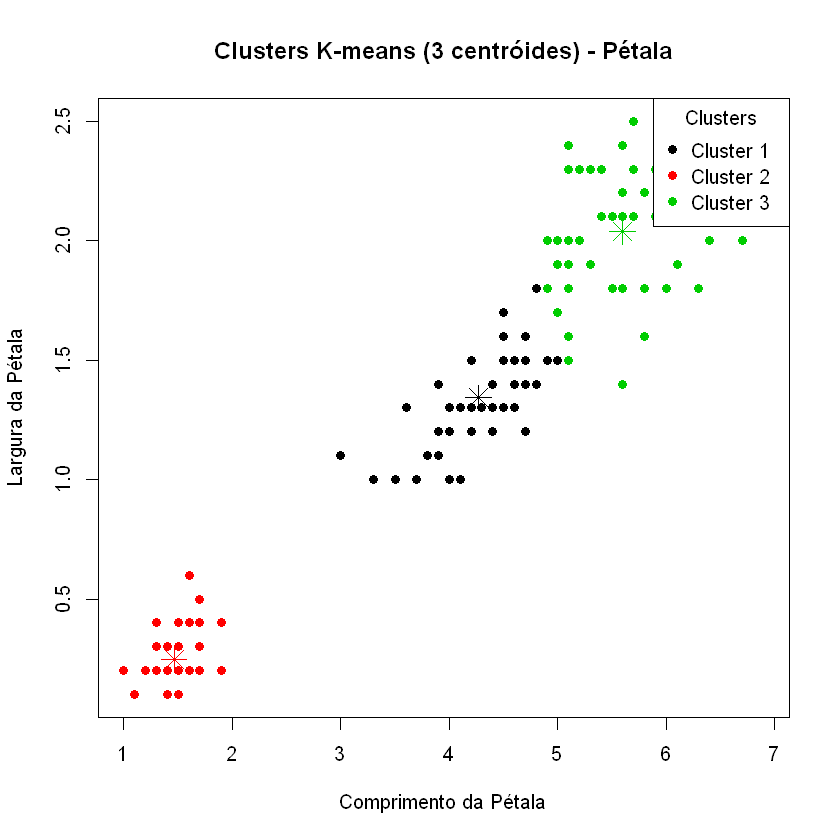

In [4]:
# png("kmeans.png", width = 800, height = 800)

plot(df$Petal.Length, df$Petal.Width, col = kmeans_result$cluster, pch = 19,
     main = "Clusters K-means (3 centróides) - Pétala",
     xlab = "Comprimento da Pétala", ylab = "Largura da Pétala")

points(kmeans_result$centers[, 1], kmeans_result$centers[, 2],
       col = 1:3, pch = 8, cex = 2)

legend("topright", 
       legend = c("Cluster 1", "Cluster 2", "Cluster 3"),
       col = 1:3, 
       pch = 19, 
       title = "Clusters")

# dev.off()


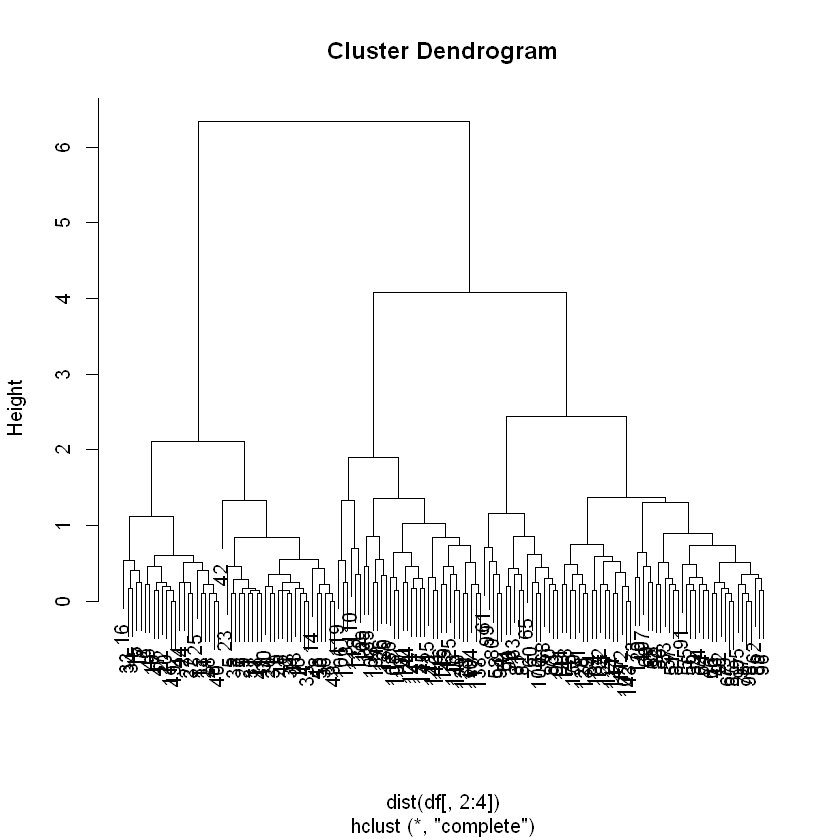

In [5]:
hc_result <- hclust(dist(df[, 2:4]))
plot(hc_result)

In [6]:
novo_ponto <- c(0.2, 1.5)

distancias <- apply(kmeans_result$centers, 1, function(centroide) {
  sqrt(sum((novo_ponto - centroide)^2))
})

cluster_mais_proximo <- which.min(distancias)

cat("O novo ponto pertence ao cluster:", cluster_mais_proximo, "\n")

distancias_dos_pontos <- apply(df[, c("Petal.Length", "Petal.Width")], 1, function(ponto) {
  centroide <- kmeans_result$centers[kmeans_result$cluster[which.min(sqrt(colSums((t(kmeans_result$centers) - ponto)^2)))], ]

  sqrt(sum((ponto - centroide)^2))
})

cat("Distâncias médias dos pontos para seus centróides:", mean(distancias_dos_pontos), "\n")

O novo ponto pertence ao cluster: 2 


Distâncias médias dos pontos para seus centróides: 2.546112 
